# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): EDA
### <center>Predict whether income exceeds $50K/yr based on census data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Leer CSV

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

In [3]:
df = pd.read_csv("../data/adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32074.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.079815,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572999,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Pairplot

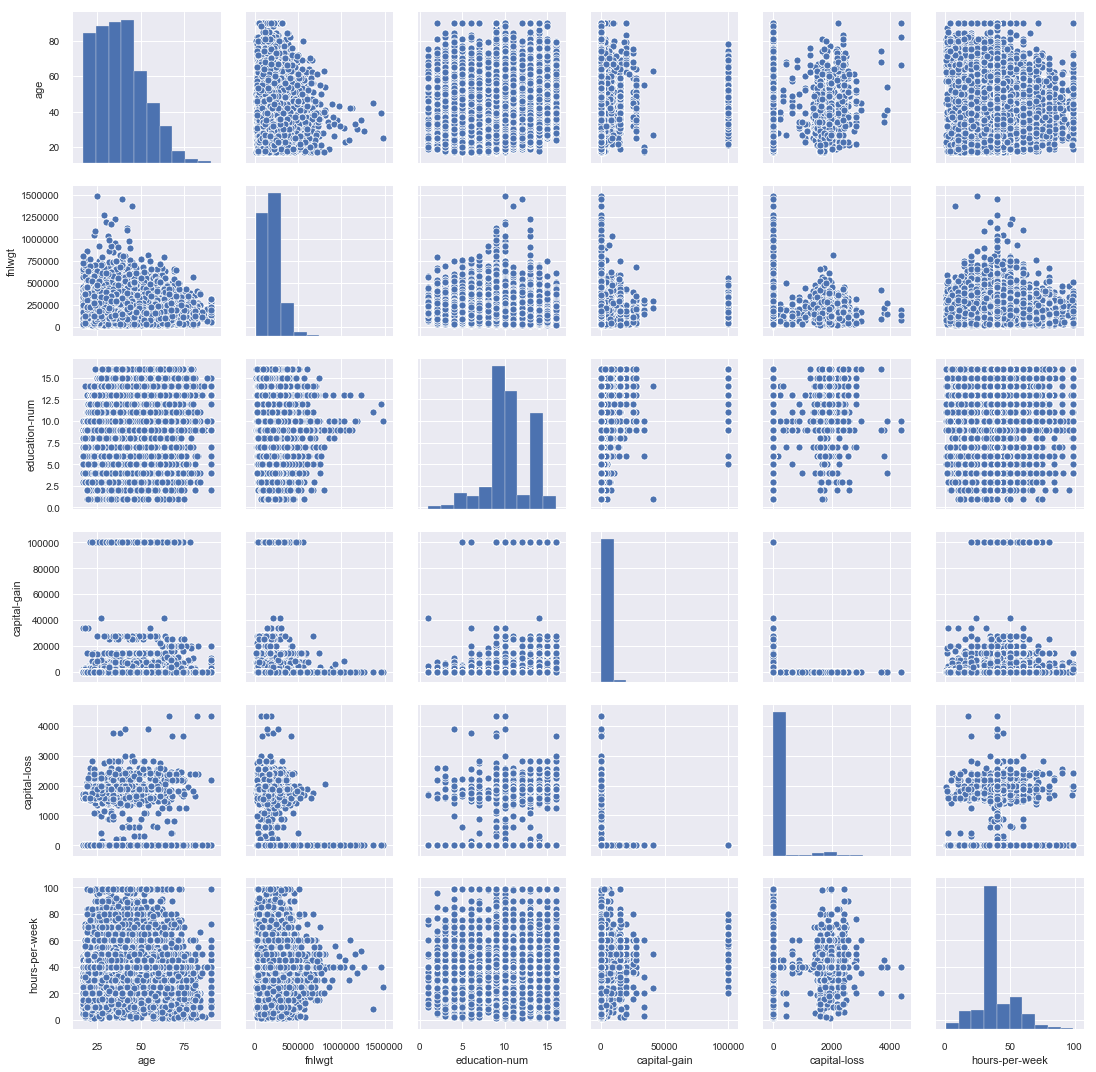

In [15]:
sns.pairplot(df);

# Pairplot en funcion de la variable a predecir

In [26]:
#sns.pairplot(df, hue="salary", dropna=True);

# Variable types

In [7]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("Numerical features:  ", len(num))
print("Categorical features:", len(cat))
print("Date/time features:  ", len(time))

Numerical features:   6
Categorical features: 9
Date/time features:   0


# Cardinallity (valores distintos)

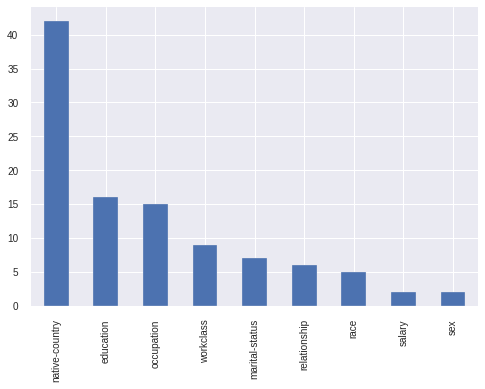

In [8]:
def plot_cardinality(df, cat):
    carinality = df[cat].nunique()
    carinality.sort_values(ascending=False, inplace=True)
    carinality.plot.bar()
    
plot_cardinality(df, cat)

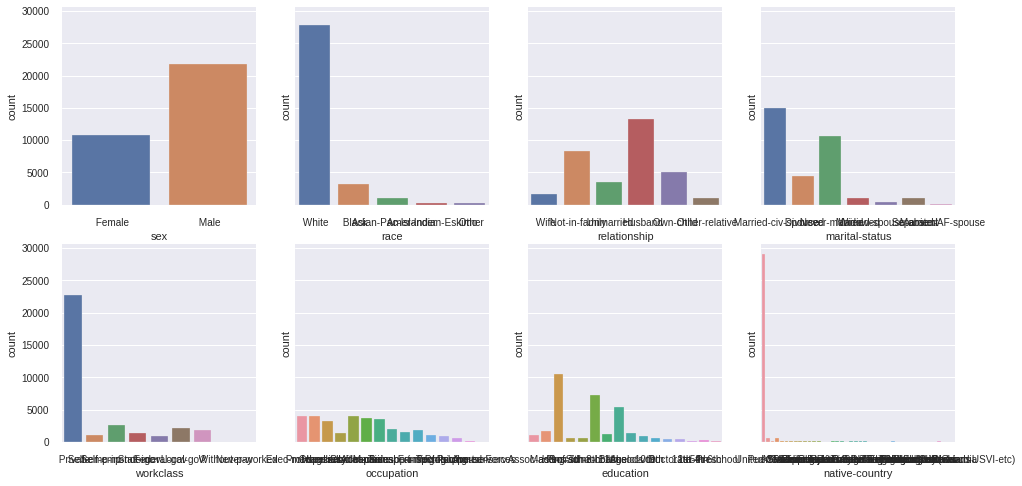

In [14]:
f, a = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)

sns.countplot(x='sex',            data=df, ax=a[0][0]);
sns.countplot(x='race',           data=df, ax=a[0][1]);
sns.countplot(x='relationship',   data=df, ax=a[0][2]);
sns.countplot(x='marital-status', data=df, ax=a[0][3]);
sns.countplot(x='workclass',      data=df, ax=a[1][0]);
sns.countplot(x='occupation',     data=df, ax=a[1][1]);
sns.countplot(x='education',      data=df, ax=a[1][2]);
sns.countplot(x='native-country', data=df, ax=a[1][3]);

# Qué queremos predecir? -> `df.Survived`

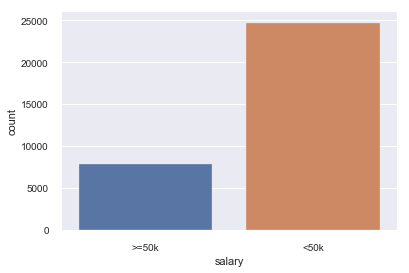

In [12]:
sns.countplot(df.salary);

# Missings

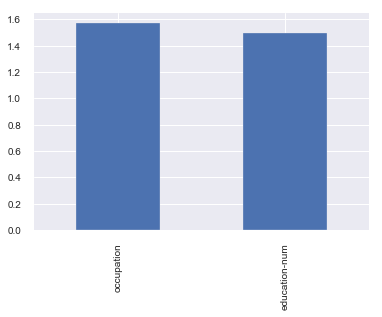

In [13]:
def plot_missings(df):
    missing = df.isnull().sum()
    missing = missing/df.isnull().count()*100
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)
    missing.plot.bar()
    
plot_missings(df)

In [18]:
#ProfileReport(df)